In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels

In [2]:
import pandas as pd # Reading datasets
import numpy as np #Operations on our dataset
import matplotlib.pyplot as plt #Visualization library
import seaborn as sns #Enhanced visualization library
from statsmodels.stats.outliers_influence import variance_inflation_factor #Handling multicollinearity
from sklearn.model_selection import train_test_split, GridSearchCV #Optimizing our model
from sklearn.preprocessing import StandardScaler, LabelEncoder #Preparing our data for modeling
from sklearn.linear_model import LogisticRegressionCV # Linear model for classification
from sklearn.tree import DecisionTreeClassifier #Tree model for classification
from sklearn.svm import SVC # Hyperplane model for classification
from sklearn.ensemble import RandomForestClassifier # Tree boosting model for classification
from sklearn.neural_network import MLPClassifier #Neural network for classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve #Metrics used for evaluating model performance
from xgboost import XGBClassifier # Boosting model for classification

In [3]:
#Reading through the train dataset

train_df = pd.read_csv(r"/kaggle/input/playground-series-s3e17/train.csv")

train_df.head() 

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
#Information on the dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
#Descriptive Statistics on the dataset

train_df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


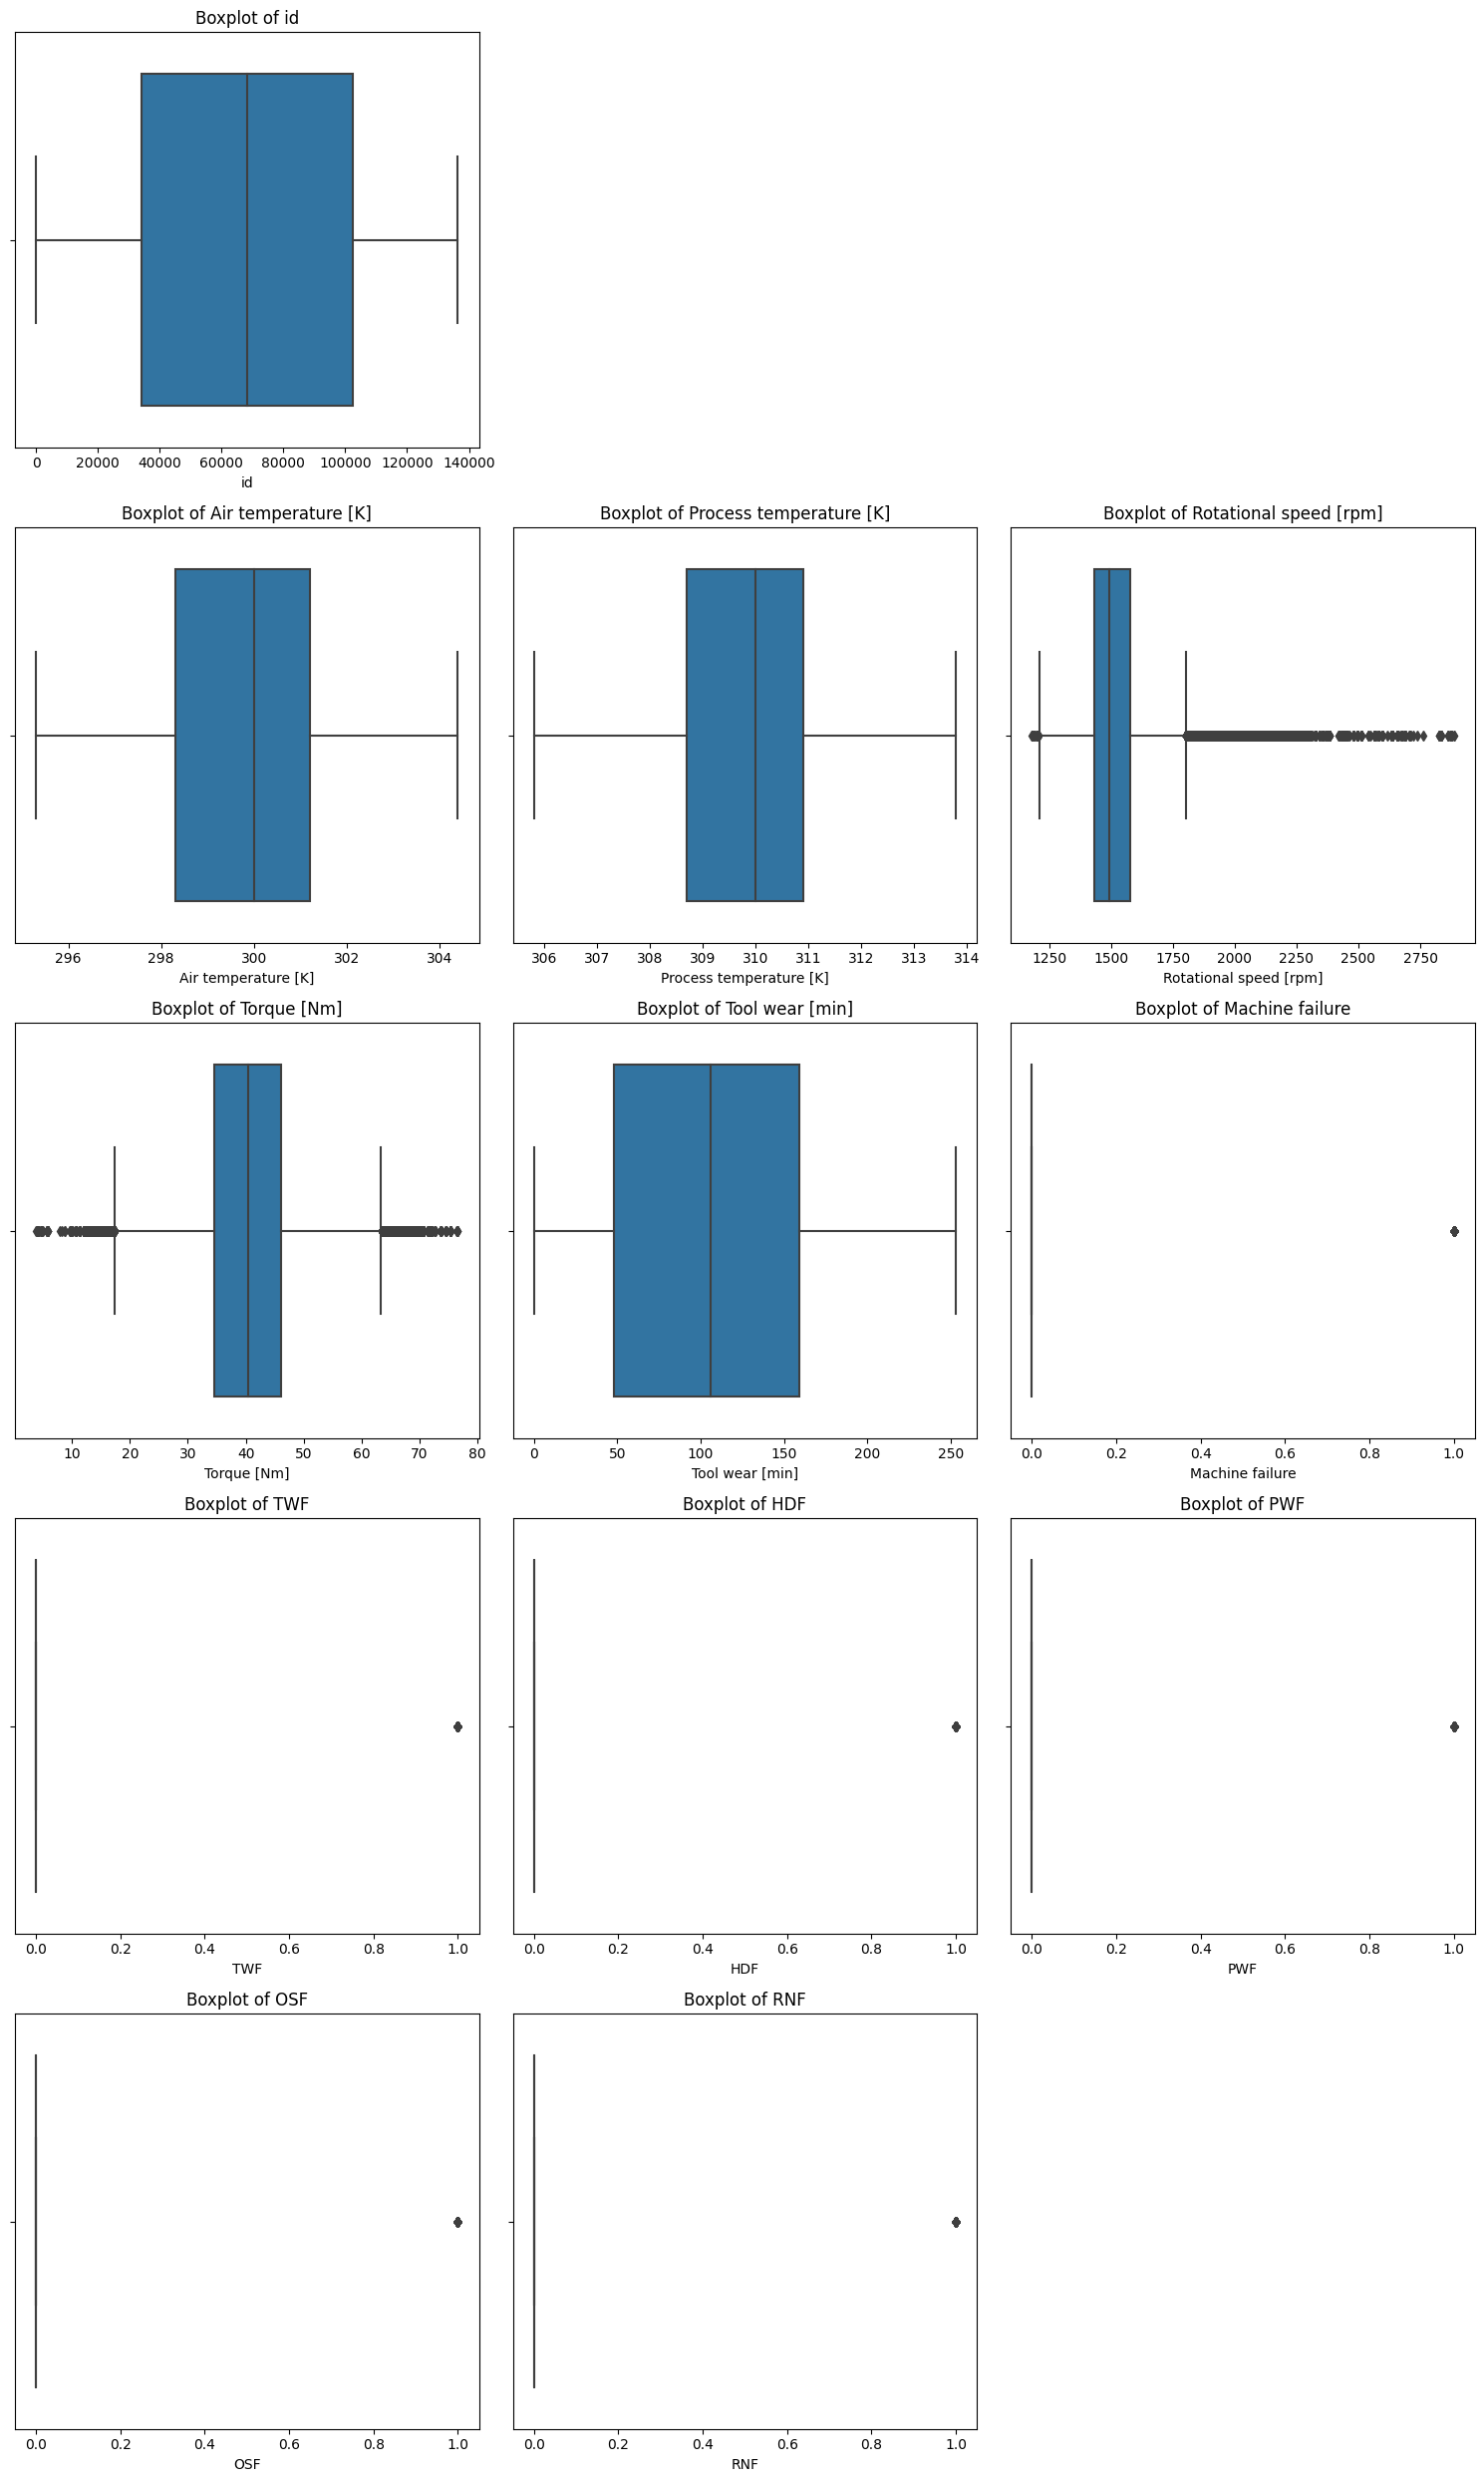

In [6]:
import warnings

# To suppress all warnings:
warnings.filterwarnings('ignore')

#Checking distributions of the various features in the dataset

num_cols = train_df.shape[1]
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(train_df, 1):
    if train_df[col].dtype != 'object':
        plt.subplot(num_rows, 3, i)  # 3 columns per row
        sns.boxplot(x=train_df[col], orient='vertical')
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

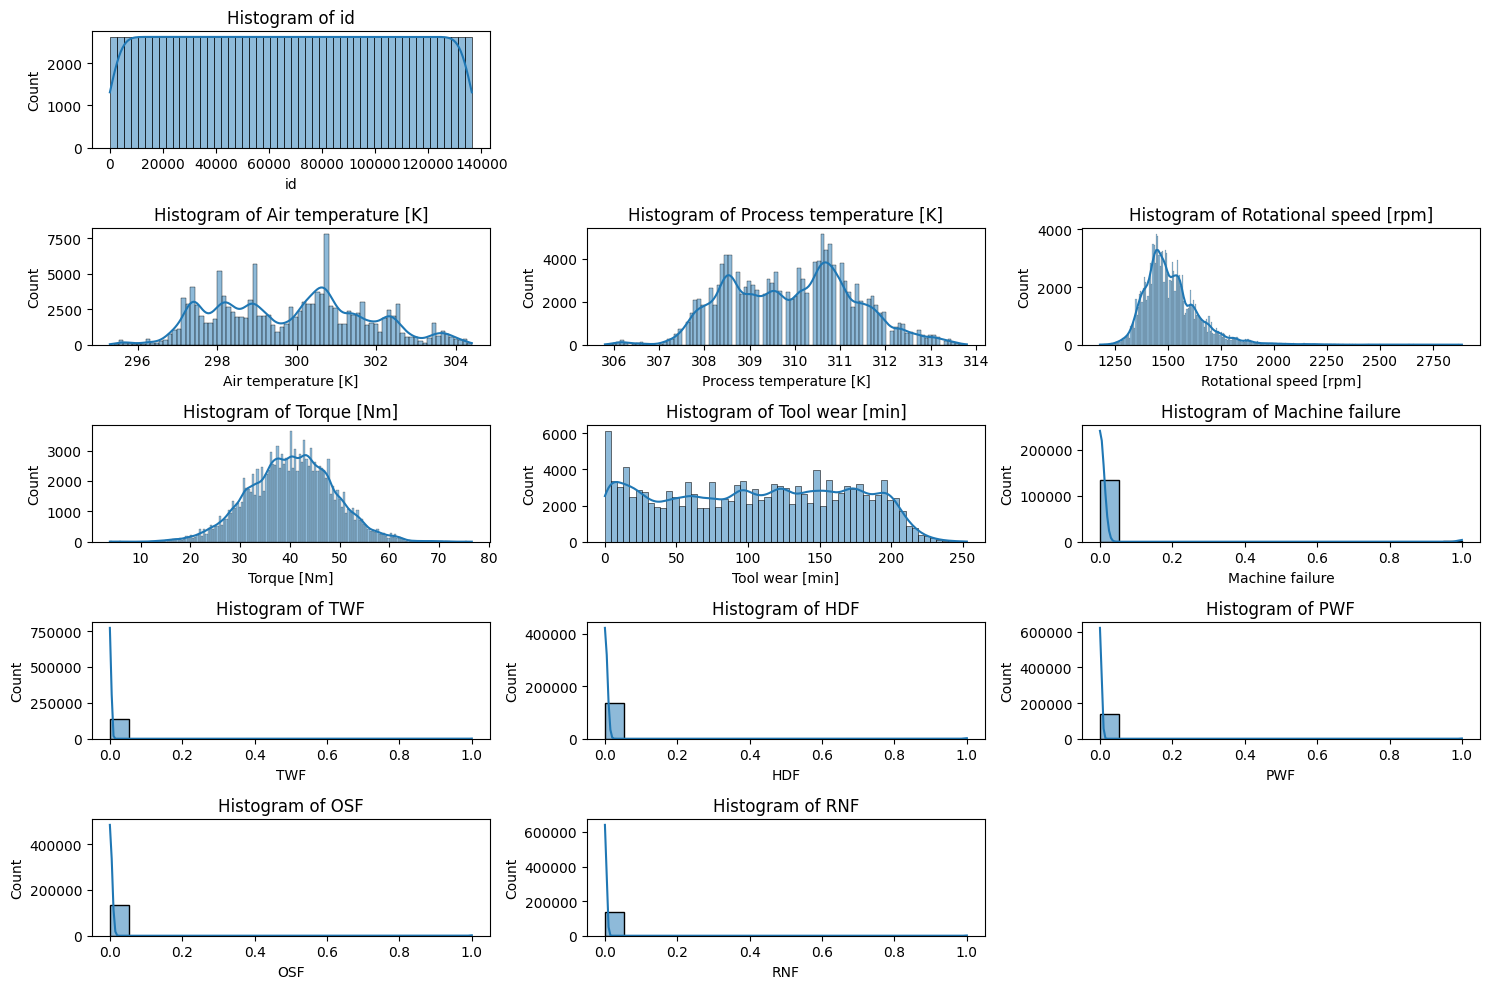

In [7]:
#More visualization on distributions

plt.figure(figsize=(15, 10))

for i, col in enumerate(train_df, 1):
    if train_df[col].dtype != 'object':
        plt.subplot(num_rows, 3, i) 
        sns.histplot(train_df[col], kde=True)  # Create a histogram with a kernel density estimate
        plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

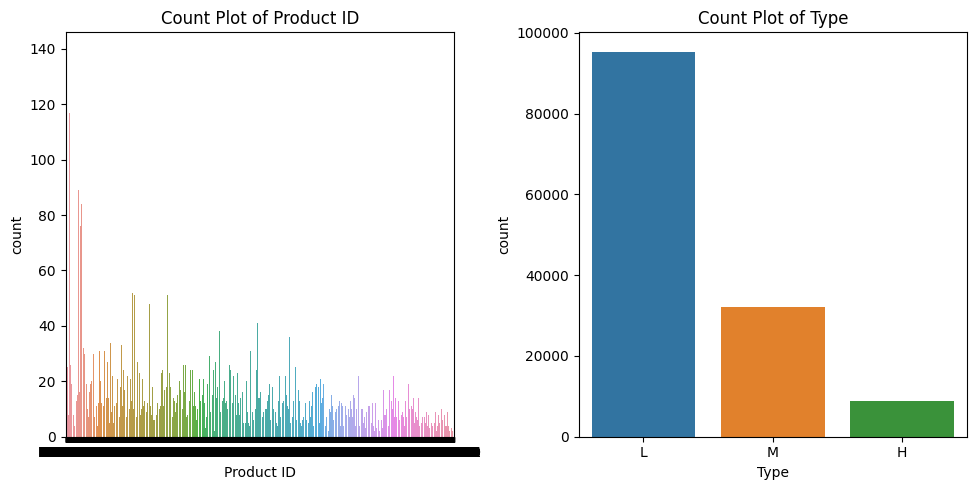

In [8]:
#Distribution of categorical columns

# Identify and filter categorical columns
categorical_cols = [col for col in train_df.columns if train_df[col].dtype == 'object']

# Calculate the number of rows needed based on the number of categorical columns
num_col = len(categorical_cols)
num_row = (num_col + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_row))  # Adjust the figure size based on the number of rows

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_row, 3, i)  # 3 columns per row
    sns.countplot(data=train_df, x=col)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

In [9]:
identity = train_df['id']
product_id = train_df['Product ID']

# Drop the specified columns from the DataFrame
columns_to_drop = ['id', 'Product ID']
train_df = train_df.drop(columns_to_drop, axis=1)

# Display the updated DataFrame
train_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [10]:
train_df = pd.get_dummies(train_df)
train_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,False,True,False
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,False,False,True
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,False,True,False
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,False,True,False
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,False,False,True


In [11]:
le = LabelEncoder()

for col in train_df.columns:
    if train_df[col].dtype == 'bool':
        print(f"Column '{col}' is boolean and will be converted to binary using LabelEncoder.")
        
        # Fit and transform the LabelEncoder on the column
        train_df[col] = le.fit_transform(train_df[col])

train_df.head()

Column 'Type_H' is boolean and will be converted to binary using LabelEncoder.
Column 'Type_L' is boolean and will be converted to binary using LabelEncoder.
Column 'Type_M' is boolean and will be converted to binary using LabelEncoder.


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [12]:
y = train_df['Machine failure'] #Target variable / Dependent variable

X = train_df.drop('Machine failure', axis =1) # Independent 

correlation = X.corrwith(y)
print(correlation)

Air temperature [K]        0.067744
Process temperature [K]    0.030966
Rotational speed [rpm]    -0.060868
Torque [Nm]                0.145793
Tool wear [min]            0.056448
TWF                        0.311919
HDF                        0.564507
PWF                        0.383941
OSF                        0.494668
RNF                        0.001428
Type_H                    -0.005832
Type_L                     0.012028
Type_M                    -0.009603
dtype: float64


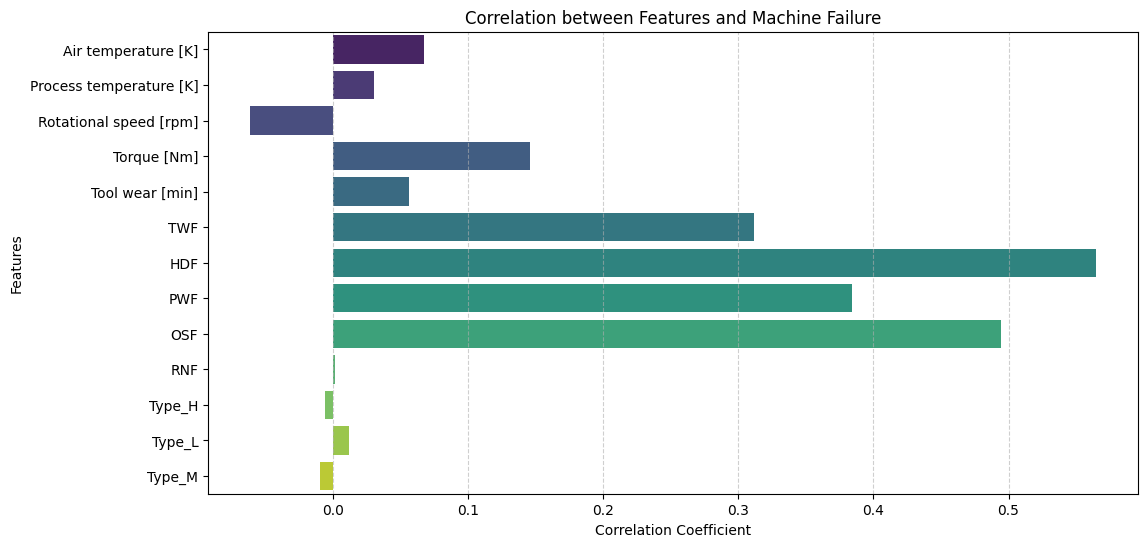

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette="viridis")
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation between Features and Machine Failure')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

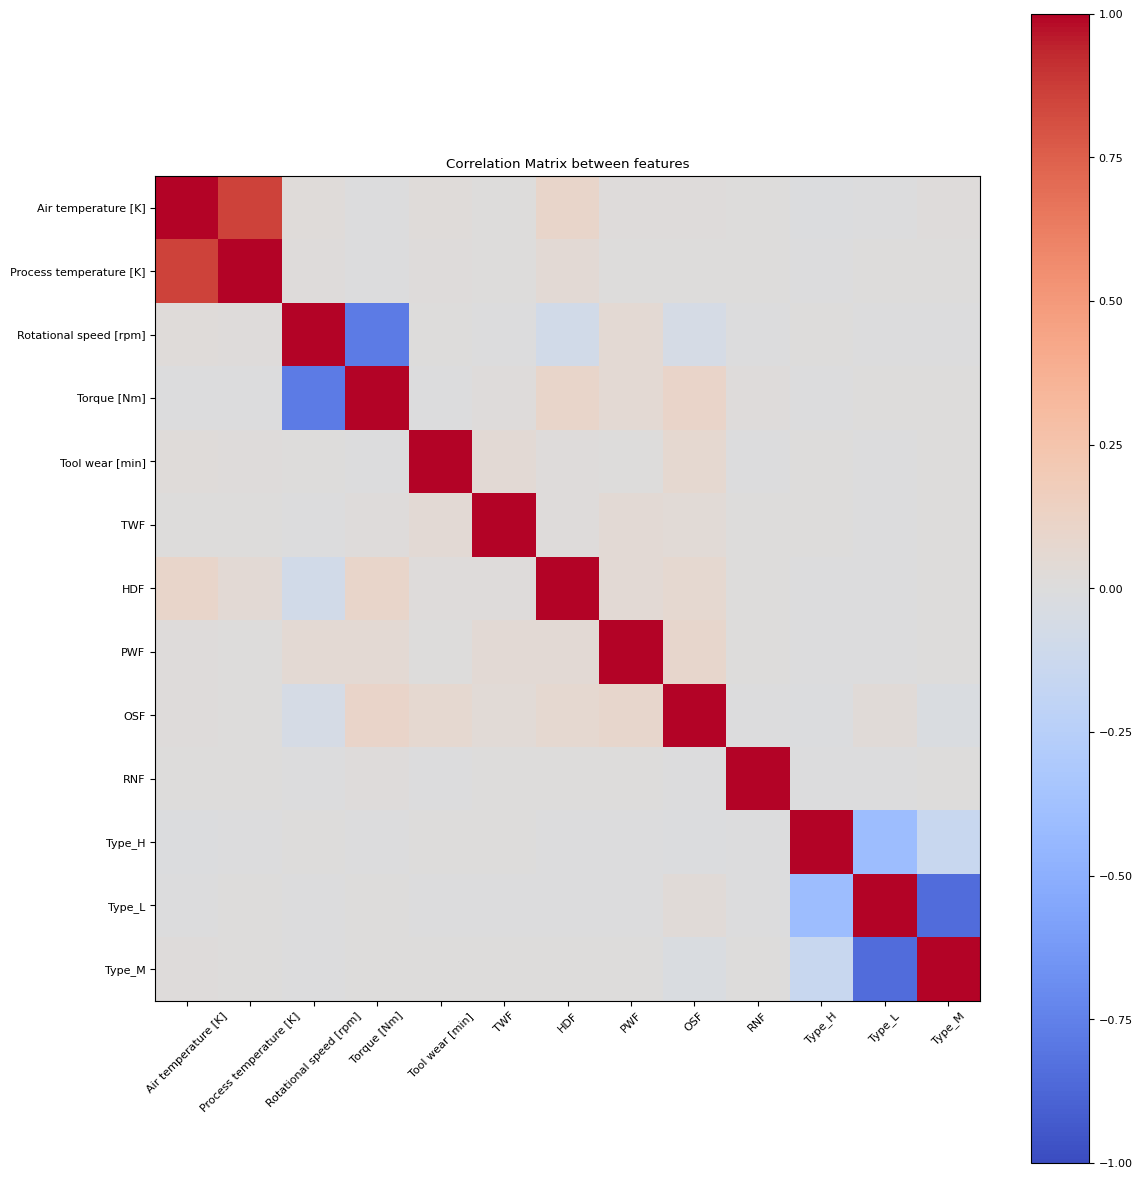

In [14]:
corr_matrix = X.corr()

# Set the font size for labels
plt.rc('font', size=8)

# Create a heatmap plot of the correlation matrix
plt.figure(figsize=(12, 12))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix between features')
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

In [15]:
print(corr_matrix)

                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                 1.000000                 0.856080   
Process temperature [K]             0.856080                 1.000000   
Rotational speed [rpm]              0.016545                 0.011263   
Torque [Nm]                        -0.006773                -0.006298   
Tool wear [min]                     0.016994                 0.012777   
TWF                                 0.003826                 0.004459   
HDF                                 0.100454                 0.041454   
PWF                                 0.007967                 0.003871   
OSF                                 0.007842                 0.005337   
RNF                                 0.004815                 0.004399   
Type_H                             -0.010449                -0.005922   
Type_L                             -0.003894                 0.002116   
Type_M                              0.010296       

In [16]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature           VIF
0       Air temperature [K]      3.807859
1   Process temperature [K]      3.773450
2    Rotational speed [rpm]      2.608549
3               Torque [Nm]      2.629488
4           Tool wear [min]      1.006546
5                       TWF      1.004756
6                       HDF      1.033562
7                       PWF      1.034850
8                       OSF      1.028807
9                       RNF      1.000123
10                   Type_H   3539.779532
11                   Type_L  37822.065649
12                   Type_M  12752.705275


In [17]:
X = X.drop(['RNF','Process temperature [K]'], axis=1)
X.head()

,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Type_H,Type_L,Type_M
0,300.6,1596,36.1,140,0,0,0,0,0,1,0
1,302.6,1759,29.1,200,0,0,0,0,0,0,1
2,299.3,1805,26.5,25,0,0,0,0,0,1,0
3,301.0,1524,44.3,197,0,0,0,0,0,1,0
4,298.0,1641,35.4,34,0,0,0,0,0,0,1


In [18]:
y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

## **Balance dataset**

In [19]:
!pip install imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define your original data
X, y = X, y  #  actual data and labels

# Count the class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Calculate the desired sampling ratio
desired_ratio = 1.0

# Calculate the number of synthetic samples to generate for the minority class
minority_class_count = sum(y == 1)
majority_class_count = sum(y == 0)
n_synthetic_samples = int(desired_ratio *  majority_class_count- minority_class_count)

# Instantiate the SMOTE object with the desired ratio
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42, k_neighbors=5)

# Fit and transform the data to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 134281, 1: 2148})
Class distribution after SMOTE: Counter({0: 134281, 1: 134281})


# Modelling


In [21]:
#Split ds

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [22]:
#standard scaler
sc = StandardScaler()

# Fit the scaler to your data (computes mean and standard deviation)
sc.fit(X_resampled)

# Transform the training and test data to standardize them
X_train_standardized = sc.transform(X_train)
X_test_standardized = sc.transform(X_test)

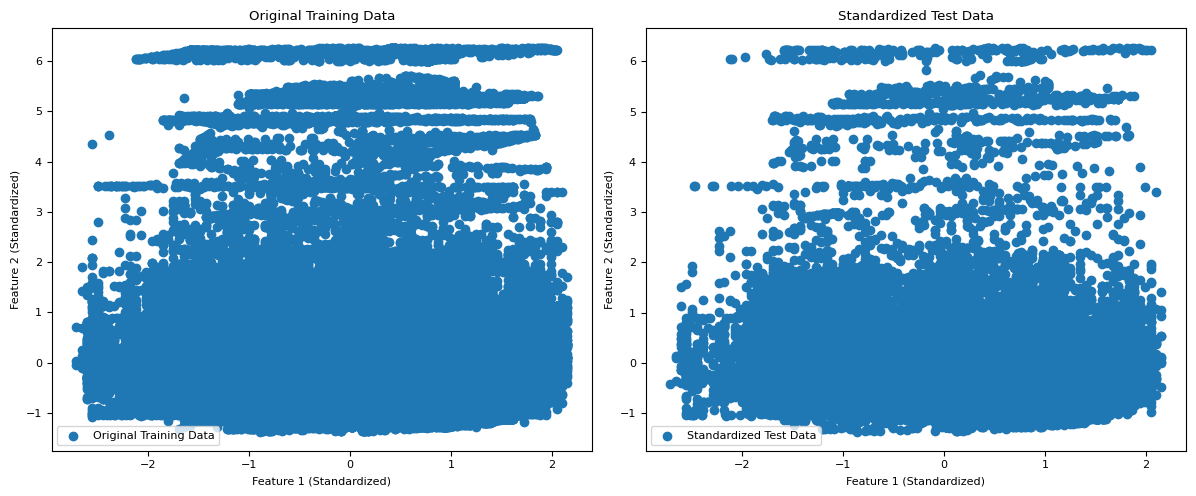

In [23]:
# Separate the features for plotting
feature1_train = X_train_standardized[:, 0]
feature2_train = X_train_standardized[:, 1]

feature1_test = X_test_standardized[:, 0]
feature2_test = X_test_standardized[:, 1]

# Plot the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(feature1_train, feature2_train, marker='o', label='Original Training Data')
plt.title('Original Training Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

# Plot the standardized data
plt.subplot(1, 2, 2)
plt.scatter(feature1_test, feature2_test, marker='o', label='Standardized Test Data')
plt.title('Standardized Test Data')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()

plt.tight_layout()
plt.show()

Training Logistic Regression...
Accuracy for Logistic Regression: 0.88
Confusion Matrix for Logistic Regression:
[[24999  1880]
 [ 4521 22313]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     26879
           1       0.92      0.83      0.87     26834

    accuracy                           0.88     53713
   macro avg       0.88      0.88      0.88     53713
weighted avg       0.88      0.88      0.88     53713

AUC-ROC for Logistic Regression: 0.94


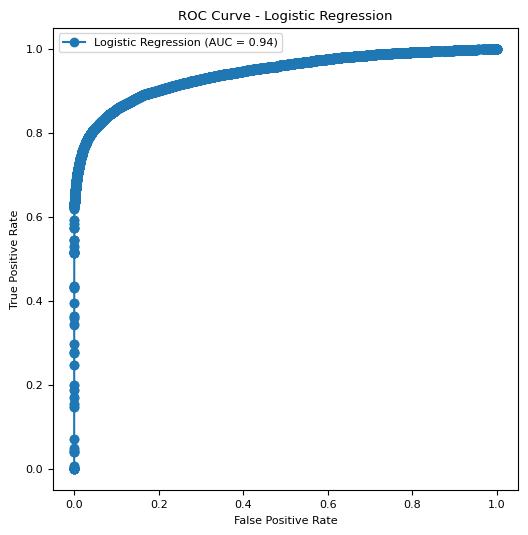



Training Decision Tree...
Accuracy for Decision Tree: 0.98
Confusion Matrix for Decision Tree:
[[26063   816]
 [  520 26314]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     26879
           1       0.97      0.98      0.98     26834

    accuracy                           0.98     53713
   macro avg       0.98      0.98      0.98     53713
weighted avg       0.98      0.98      0.98     53713

AUC-ROC for Decision Tree: 0.98


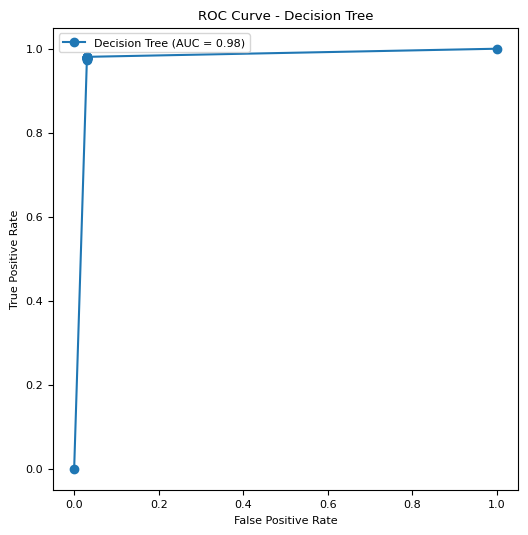



Training Random Forest...
Accuracy for Random Forest: 0.99
Confusion Matrix for Random Forest:
[[26447   432]
 [  335 26499]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     26879
           1       0.98      0.99      0.99     26834

    accuracy                           0.99     53713
   macro avg       0.99      0.99      0.99     53713
weighted avg       0.99      0.99      0.99     53713

AUC-ROC for Random Forest: 1.00


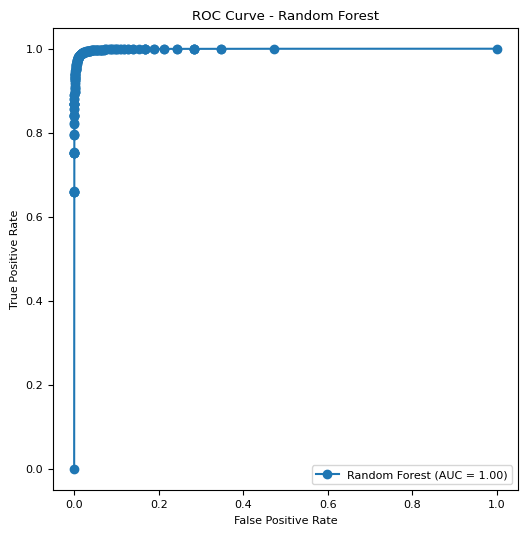



Training MLP Classifier...
Accuracy for MLP Classifier: 0.92
Confusion Matrix for MLP Classifier:
[[25184  1695]
 [ 2502 24332]]
Classification Report for MLP Classifier:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     26879
           1       0.93      0.91      0.92     26834

    accuracy                           0.92     53713
   macro avg       0.92      0.92      0.92     53713
weighted avg       0.92      0.92      0.92     53713

MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.


Training XGBoost...
Accuracy for XGBoost: 0.99
Confusion Matrix for XGBoost:
[[26707   172]
 [  266 26568]]
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26879
           1       0.99      0.99      0.99     26834

    accuracy                           0.99     53713
   macro avg       0.99      0.99      0.99     53713
wei

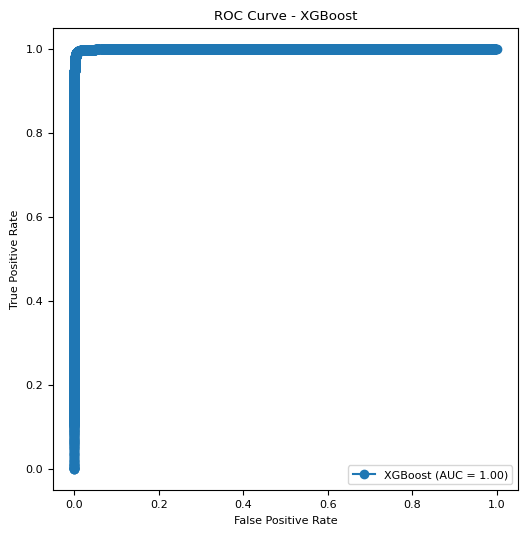



Training Support Vector Matrix...


In [ ]:
models = {
    'Logistic Regression': LogisticRegressionCV(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLP Classifier': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# Iterate through models and evaluate each one
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_standardized, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_standardized)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n{confusion}")
    
    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{classification_rep}")
    
    # ROC Curve and AUC
    if name != 'MLP Classifier':  # MLP Classifier doesn't have predict_proba
        y_prob = model.predict_proba(X_test_standardized)[:, 1]  # Probability of class 1
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC for {name}: {roc_auc:.2f}")
    
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, marker='o', label=f"{name} (AUC = {roc_auc:.2f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend()
        plt.show()
    else:
        print("MLP Classifier does not support predict_proba, so AUC-ROC cannot be calculated.")
    
    print("\n")